<a href="https://colab.research.google.com/github/HoonC-corgi/Machine_Learning_SelfStudy/blob/main/05_1_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀로 분류

In [2]:
import pandas as pd
wine = pd.read_csv('http://bit.ly/wine_csv_data')

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [7]:
# info() 메소드는 데이터 프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인 가능함
wine.info()
# Non-Null Count == 누락 데이터 X, Dtype float == 실수형 데이터
# 만약 누락된 값이 있다면 해당 데이터를 버리거나 평균값으로 채운 후 사용, 이 경우에도 훈련 세트의 통계 값으로 테스트 세트를 변환해야 함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [9]:
# describe() 메소드는 열에 대한 간략한 통계를 출력함. 최소, 최대, 평균값 등을 볼 수 있음
wine.describe()
# 알코올과, 당도, 산도의 스케일이 다름을 확인 가능 >> 표준화 진행

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [11]:
# 판다스 데이터 프레임을 넘파이 배열로 바꾸어 훈련 세트와 데이터 세트로 나눔
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [15]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)   
# train_test_split()의 테스트 세트 비율은 25%가 디폴트, 데이터가 많으므로 20%로 지정

In [16]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [18]:
# 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [20]:
# 로지스틱 회귀가 학습한 계수와 절편
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


# 결정 트리

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


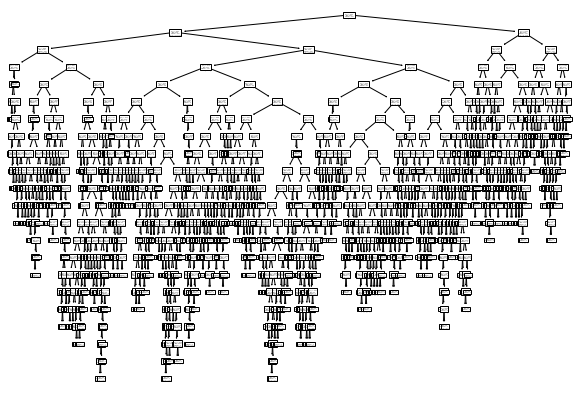

In [24]:
# 사이킷런의 plot_tree() 메소드는 결정 트리를 트리 그림으로 출력함
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

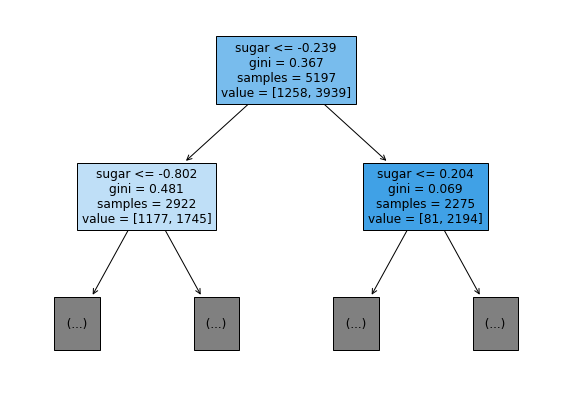

In [27]:
# 루트노드는 트리의 최상단 노드를, 리프 노드는 최하단 노드를 의미함
# max_depth 매개변수를 1로 주면 루트 노드를 제외한 하나의 노드를 더 확장하여 그림
# filled 매개변수에서 클래스에 맞게 노드의 색을 지정할 수 있음
# feagure_names 매개변수에서 특성의 이름을 전달할 수 있음
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()
# 테스트 조건, 불순도, 총 샘플 수, 클래스 별 샘플 수를 의미함

# 불순도 Gini impurity
  DecisionTreeClassifier 클래스에서 노드의 데이터를 분할할 기준을 정하는 매개변수 criterion의 디폴트는 'gini'이다. 

  이 지니 불순도를 통해 당도 -0.239를 기준으로 구분한 것
  ## 지니 불순도 계산법
  ### 지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)
      어떤 노드의 클래스 비율이 정확히 1/2라면, 불순도는 0,5로 최악이,
      하나의 클래스만 있다면 불순도는 0이 되어 '순수 노드'가 됨


# 정보 이득
  결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킴
  이 때 불순도의 차이를 정보 이득이라 함

  ## criterion='gini', 정보 이득 계산법
  ### 정보 이득 = 부모의 불순도 - (왼쪽 노드 샘플 수/ 부모의 샘플 수) * 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) * 오른쪽 노드 불순도


  ## criterion='entropy', 정보 이득 계산법
  ### 정보 이득 = -음성클래스 비율 * log2(음성 클래스 비율) - 양성 클래스 비율 * log2(양성 클래스 비율)

# 가지치기
  가지치기를 하지 않으면 일반화가 잘 되지 않음 >> 테스트 점수가 낮아짐

In [30]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


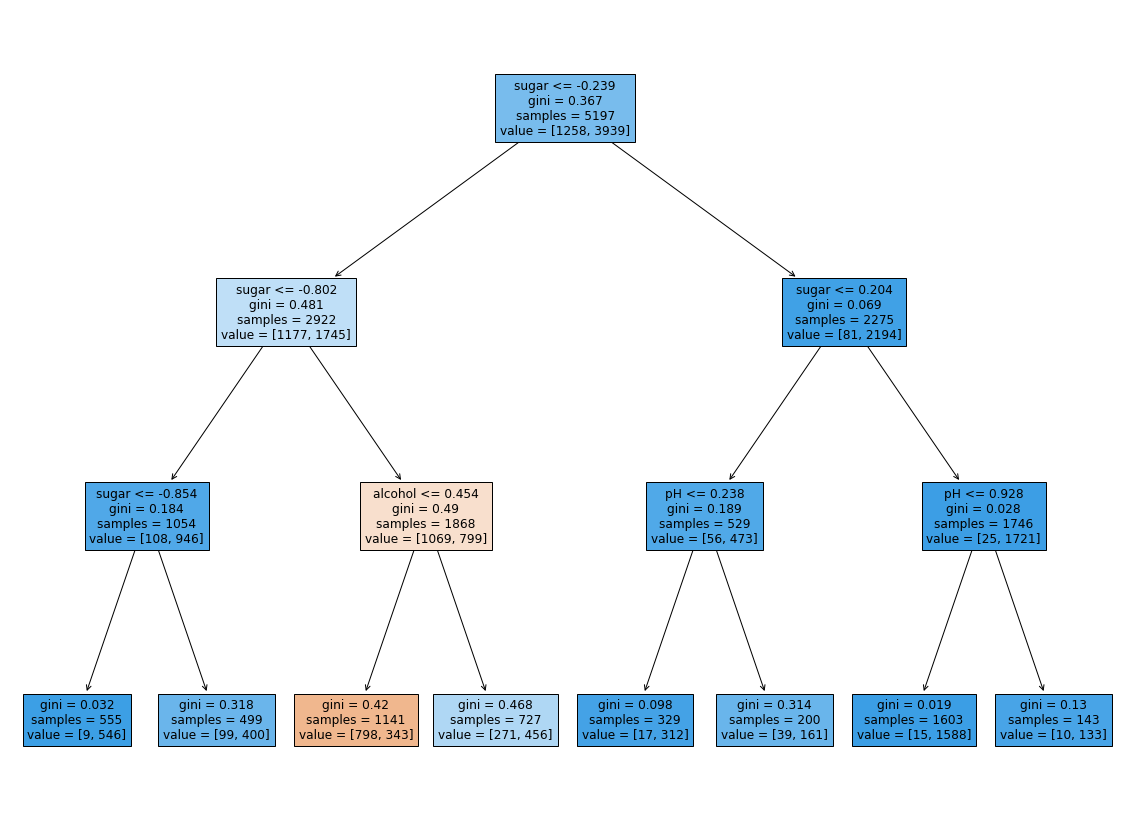

In [31]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [32]:
# 전처리 전의 훈련 세트와 테스트 세트로 다시 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


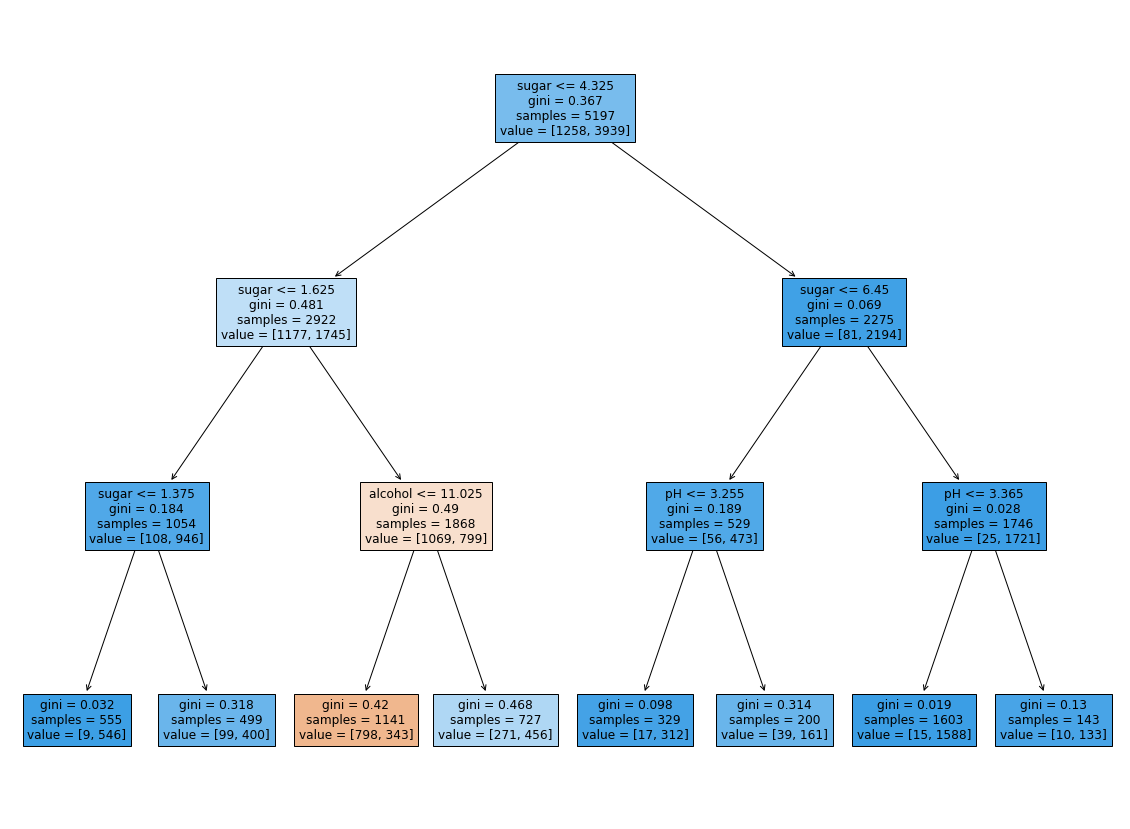

In [34]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [35]:
# 트리에는 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산해 줌, 이는 결정 트리 모델의 feature_importances_ 속성에 저장
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


# 전체 소스코드

# 결정 트리

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 로지스틱 회귀로 와인 분류하기

In [ ]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


### 설명하기 쉬운 모델과 어려운 모델

In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


## 결정 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


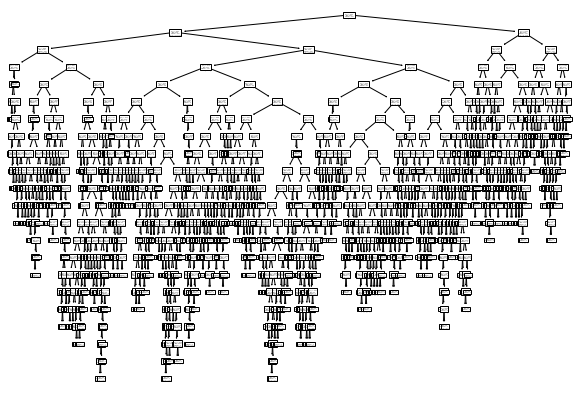

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

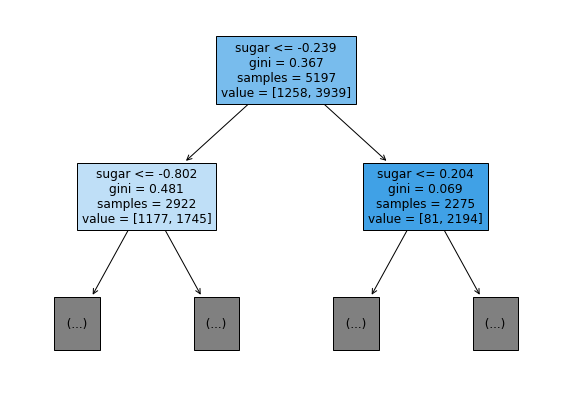

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 가지치기

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


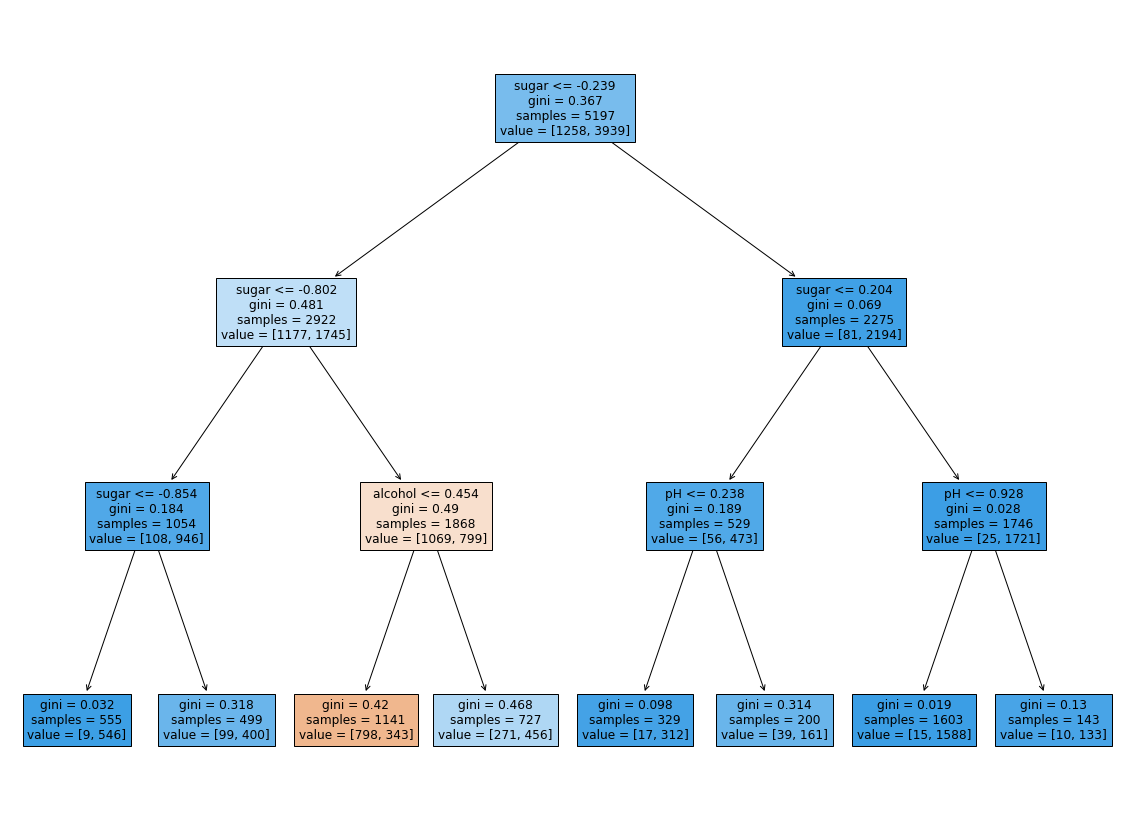

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


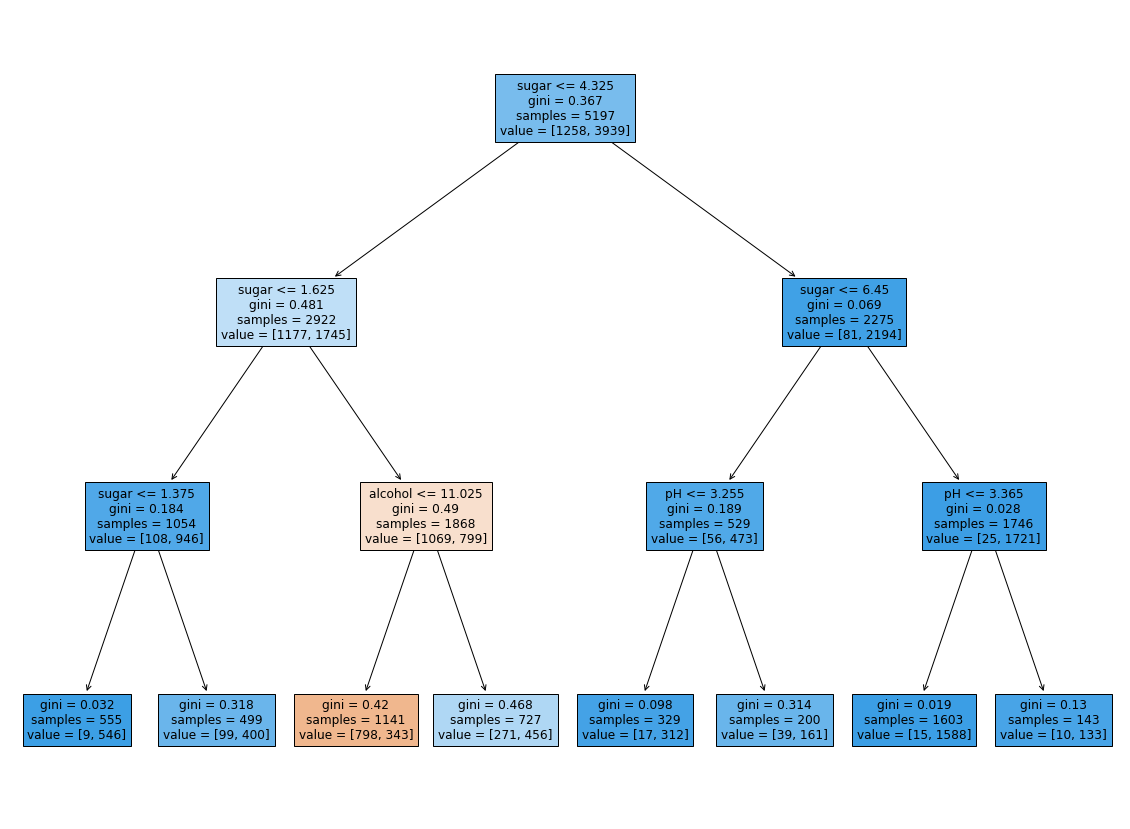

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


## 확인문제

In [ ]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


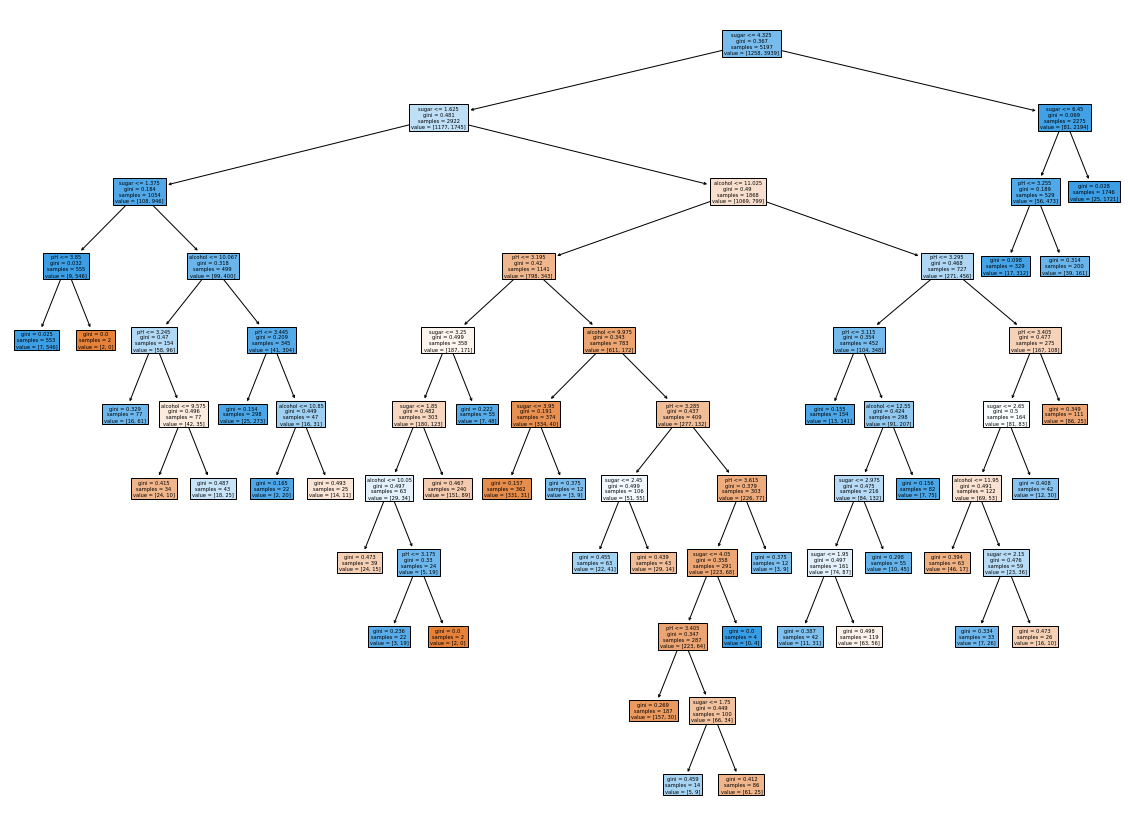

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 총 정리

# 키워드
  ## 결정트리
      문답식 정답 학습 알고리즘, 직관적

  ## 불순도
      결정 트릭가 최적의 질문을 찾기 위한 기준, 사이킷런은 지니 불순도와 엔트로피 불순도를 제공

  ## 정보 이득
      부모 노드와 자식 노드의 불순도 차이, 결정 트리 알고리즘은 정보 이득이, 즉 불순도 차이가 최대화되도록 학습함

  ## 가지치기
      결정 트리는 제한 없이 성장하면 과대적합되기 쉬워, 여러 매개변수를 활용해 가지치기를 해야함

  ## 특성 중요도
      결정 트리에 사요오딘 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값

    

# 핵심 패키지와 함수
  ## pandas
  ### info()
     데이터프레임의 요약된 정보를 출력, 인덱스와 컬럼 타입, Null이 아닌 값의 개수, 메모리 사용량을 제공
     vervose 매개변수의 기본값 True를 False로 바꾸면 각 열에 대한 정보를 출력하지 않음

  ### describe()
      데이터 프레임 열의 통계 값을 제공, 수치형일 경우 최소, 최대, 평균, 표준편차와 사분위 값 등이 출력
      percentiles 매개변수에서 백분위수 지정, 디폴트는 [0.25, 0.5, 0.75]


  ## scikit-learn
  ### DecisionTreeClassifier
      결정 트리 분류 클래스

      criterion 매개변수로 불순도를 지정, 디폴트는 'gini', 'entropy'도 지정 가능

      splitter 매개변수는 노드를 분할하는 전략을 선택, 디폴트는 'best'로 정보 이득이 최대가 되도록 분할, 'random'이면 임의 분할

      max_depth는 트리가 성장할 최대 깊이를 지정, 디폴트는 None으로 리프 노드가 순수하거나 min_samples_split보다 샘플 개수가 적을 때까지 성장

      min_samples_split은 노드를 나누기 위한 최소 샘플 개수, 디폴트는 2

      max_features 매개변수는 최적의 분할을 위해 탐색할 특성의 개수를 지정, 디폴트는 None으로 모든 특성 사용


  ### plot_tree()
        결정 트리 모델을 시각화, 첫 매개변수로 결정 트리 모델 객체를 전달함

        max_depth 매개변수로 나타낼 트리의 깊이 지정, 디폴트는 None으로 모든 노드를 출력

        feature_names 매개변수로 특성의 이름을 지정

        filled 매개변수를 True로 지정하면 타깃값에 따라 노드 안에 색을 채움


  
# 팁
  ## 표준화
      결정 트리 모델은 샘플 내 클래스의 비율을 통해 불순도를 설정, 샘플을 분류하므로 표준화가 필요하지 않음

  ## 결정트리 해석법
  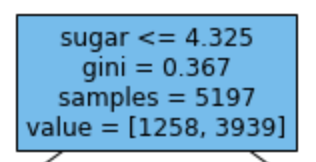

  1. 테스트 조건
  2. 불순도
  3. 총 샘플 수
  4. 클래스별 샘플 수

1. info() 메소드를 통해 각 열의 데이터 타입, 누락 데이터 유무를 체크
2. describe()를 통해 평균, 표준편차, 최소값, 사분위수, 최댓값을 확인할 수 있다.
3. 이 때 각 특성의 스케일이 달라도 표준화를 진행하지 않아도 된다.

# 연습 문제

0.8874350586877044
0.8615384615384616


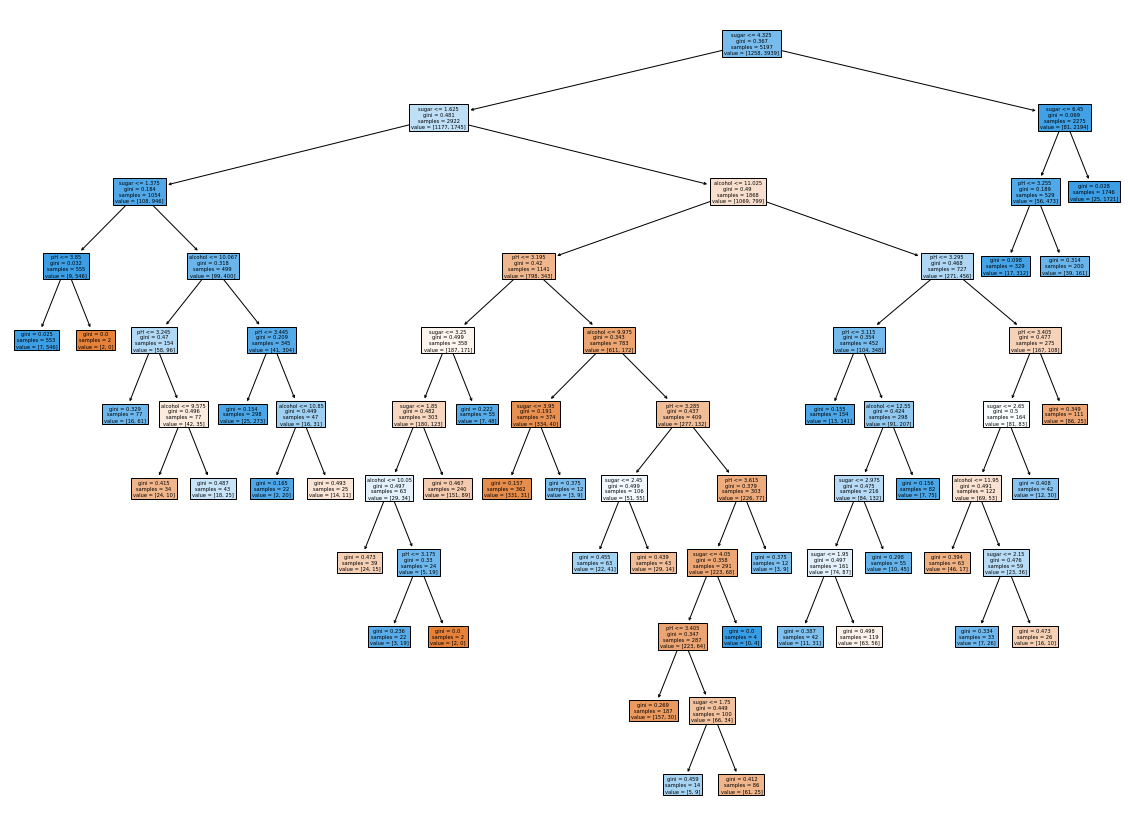

In [39]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()